**PREDICTION ON PATIENT'S ATTENDANCE TO MEDICAL APPOINTMENT**


---



# Background

In this project, the data associated with No Show Appointment will be analyzed. 

Project Context: A person makes a doctor appointment, receives all the instructions and no-show. Who to blame? In particular, the analysis goal is to find the factors affecting the patient to show up for a scheduled appointment. This will be accomplished by finding a co-relation between each variable or multiple variables with patient NO show up. The data involves the following: scheduled date, gender, age, scholarship (True or False indicates whether or not the patient is enrolled in Brazilian welfare program), Neighborhood (indicated the location of the hospital), Hipertension (True or False), Diabetes (True or False), Alcoholism (True or False), Handcap (True or False) and SMS_received (indicated whether 1 or more messages sent to the patient).

# Import Library

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib import pylab
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import plot_importance

# Import Dataset

Data Description
* PatientId: Identification of a patient
* AppointmentID: Identification of each appointment
* Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
* ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
* AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.
* Age: How old is the patient.
* Neighbourhood: The location of the hospital
* Scholarship: True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
* Hipertension: True or False
* Diabetes: True or False
* Alcoholism: True or False
* Handcap: True or False
* SMS_received: 1 or more messages sent to the patient.
* No-show: True or False.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dibimbing/medical_appointment.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Preliminary Observation

In [ ]:
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
77377,7.218666e+14,5662773,M,2016-05-05T09:00:48Z,2016-05-30T00:00:00Z,6,SANTO ANTÔNIO,0,0,0,0,0,1,Yes
43798,3.536483e+12,5620355,F,2016-04-26T08:56:30Z,2016-05-06T00:00:00Z,56,GURIGICA,0,0,0,0,0,1,No
97212,3.341451e+14,5565036,M,2016-04-11T08:24:04Z,2016-06-08T00:00:00Z,49,DE LOURDES,0,0,0,0,1,1,Yes
58267,9.428715e+13,5696049,F,2016-05-13T11:30:24Z,2016-05-24T00:00:00Z,3,JARDIM DA PENHA,0,0,0,0,0,0,Yes
49345,7.816952e+12,5696701,F,2016-05-13T14:01:03Z,2016-05-13T00:00:00Z,89,JARDIM DA PENHA,0,1,0,0,0,0,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Observation:
* There are 110,527 rows of data and there is no missing value in each column.
* There are 9 numerical columns and 5 categorical columns.
* `PatientId` and `AppointmnetID` should be converted into string.
* `ScheduledDay` and `AppointmentDay` should be converted into date.

In [ ]:
# Number of duplicated data
df.duplicated().sum()

0

* There is no duplicated data.

In [ ]:
# Convert PatientId and AppointmentID into string
df['PatientId'] = df['PatientId'].astype('int')
df[['PatientId','AppointmentID']] = df[['PatientId','AppointmentID']].astype('string')

# Convert ScheduledDay and AppointmentDay into datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  string             
 1   AppointmentID   110527 non-null  string             
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

# Data Wrangling

In [ ]:
# Reading all columns
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
# Renaming columns with typo & inconsistent name
df.columns = ['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_Received', 'No_Show']

In [ ]:
# Group columns based on data type
cat_df = ['Gender','Neighbourhood','No_Show']
num_df = ['Age','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_Received']
date_df = ['ScheduledDay','AppointmentDay']

* `PatientID` & `AppointmentID` are not included since they don't give any statistical insight (will be confirmed separately).

## Numericals

In [ ]:
# Numerical statistical sumary
df[num_df].describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Observation:
* `Age` has min -1 and max above 100 which is suspicious (can cause outliers).
* `Handicap` is described as boolean in the data description, but has max value of 4.
* `SMS_Received` has max value of 1, which means patients only received information about the appointment once or none at all.
* Other columns are fine as they are boolean.

### Age

In [ ]:
# Check data with Age less than 0
df[df['Age']<0]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
99832,465943158731293,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


* Since there is only one data with age less than 0, we will remove it. For the data with Age more than 100 will be observed later.

In [ ]:
# Only preserve data with Age >= 0
df = df[df['Age']>=0]

In [ ]:
# Check data with Age more than 100
df[df['Age']>100]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
58014,976294799775439,5651757,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,0,0,0,No
63912,31963211613981,5700278,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,31963211613981,5700279,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,31963211613981,5562812,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,31963211613981,5744037,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No
90372,234283596548,5751563,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,748234579244724,5717451,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No


* We will assume patients with age over 100 are very old person because the max age still makes sense.

### Handicap

In [ ]:
# Check Handicap data
print(df['Handicap'].value_counts())

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64


Since the data in `Handicap` should be boolean, all data above 0 will be converted into 1.

In [ ]:
# Converting Handicap data that has >0 value into 1
df['Handicap'] = np.where(df['Handicap']>0, 1, 0)

<ipython-input-17-aabba0d02510>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Handicap'] = np.where(df['Handicap']>0, 1, 0)


In [ ]:
# Numerical statistical sumary
df[num_df].describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The numerical data seems good for now

## Categoricals

In [ ]:
# Describe method on categorical data
df[cat_df].describe()

,Gender,Neighbourhood,No_Show
count,110526,110526,110526
unique,2,81,2
top,F,JARDIM CAMBURI,No
freq,71839,7717,88207


In [ ]:
# Showing the precise value counts of categorical columns
for col in cat_df:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of Gender column
F    71839
M    38687
Name: Gender, dtype: int64 

Value counts of Neighbourhood column
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64 

Value counts of No_Show column
No     88207
Yes    22319
Name: No_Show, dtype: int64 



## Date Time

Column `ScheduledDay` and `AppointmentDay` are dates, but only `ScheduledDay` has detail of time, so we will separate the date and time into different columns.

In [ ]:
# Creating a new column containing just the scheduling time
df['ScheduledTime'] = df.ScheduledDay.dt.time
# Normalizing the "Day" columns to keep just the date information (dropping the time info)
df['ScheduledDay'] = df.ScheduledDay.dt.normalize()

The gap between `ScheduledDay` and `AppointmentDay` will be calculated in the new column `WaitingDays`

In [ ]:
# Creating new column WaitingDays
df['WaitingDays'] = df['AppointmentDay'] - df['ScheduledDay']
df['WaitingDays'] = df['WaitingDays'].dt.days

Since `AppointmentDay` should be after `ScheduledDay`, we will check if there is any `AppointmentDay` before `ScheduledDay` in the data.

In [ ]:
# Check data with WaitingDays less than 0
df[df['WaitingDays']<0]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show,ScheduledTime,WaitingDays
27033,7839272661752,5679978,M,2016-05-10 00:00:00+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,10:51:53,-1
55226,7896293967868,5715660,F,2016-05-18 00:00:00+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,14:50:41,-1
64175,24252258389979,5664962,F,2016-05-05 00:00:00+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,13:43:58,-1
71533,998231581612122,5686628,F,2016-05-11 00:00:00+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,13:49:20,-6
72362,3787481966821,5655637,M,2016-05-04 00:00:00+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,06:50:57,-1


In [ ]:
# Only preserve data with WaitingDays >= 0
df = df[df['WaitingDays']>=0]

In [ ]:
# Extract day & month index from ScheduledDay and AppointmentDay
#df['ScheduledDayName'] = df['ScheduledDay'].dt.day_name()
df['ScheduledDayIndex'] = df['ScheduledDay'].dt.weekday
df['ScheduledMonth'] = df['ScheduledDay'].dt.month
#df['AppointmentDayName'] = df['AppointmentDay'].dt.day_name()
df['AppointmentDayIndex'] = df['AppointmentDay'].dt.weekday
df['AppointmentMonth'] = df['AppointmentDay'].dt.month

<ipython-input-25-83c20623faaf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ScheduledDayIndex'] = df['ScheduledDay'].dt.weekday
<ipython-input-25-83c20623faaf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ScheduledMonth'] = df['ScheduledDay'].dt.month


## ID Columns

In [ ]:
# Counting unique appointmnet
unique_appointment = len(df['AppointmentID'].unique())
unique_appointment

110521

In [ ]:
# Counting unique patients
unique_patient = len(df['PatientID'].unique())
unique_patient

62298

In [ ]:
# Appointments per patient
unique_appointment / unique_patient

1.7740697935728273

Observation:
* `AppointmentID` is unique
* `PatientID` is not unique, on average there is 1.77 appointments made per patients

In [ ]:
# Creating new column to count patient occurences
df['PatientCount'] = df.groupby('PatientID').PatientID.transform('count')

In [ ]:
df.sample(5)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,Handicap,SMS_Received,No_Show,ScheduledTime,WaitingDays,ScheduledDayIndex,ScheduledMonth,AppointmentDayIndex,AppointmentMonth,PatientCount
23481,8992743795434,5541708,F,2016-04-05 00:00:00+00:00,2016-05-16 00:00:00+00:00,49,VILA RUBIM,0,0,0,...,0,0,No,08:16:05,41,1,4,0,5,4
78145,8639584583315,5708740,F,2016-05-17 00:00:00+00:00,2016-05-17 00:00:00+00:00,25,SANTA MARTHA,0,0,0,...,0,0,Yes,11:58:58,0,1,5,1,5,1
89890,2627735964118,5773379,F,2016-06-06 00:00:00+00:00,2016-06-06 00:00:00+00:00,58,BONFIM,0,0,0,...,0,0,No,07:08:50,0,0,6,0,6,2
105494,79535584147831,5732440,M,2016-05-24 00:00:00+00:00,2016-06-07 00:00:00+00:00,46,MARUÍPE,0,0,0,...,0,1,Yes,11:30:22,14,1,5,1,6,3
9530,437462654515,5556720,M,2016-04-07 00:00:00+00:00,2016-05-17 00:00:00+00:00,36,ROMÃO,0,0,0,...,0,0,Yes,12:56:11,40,3,4,1,5,1


In [ ]:
# Sampling certain PatientId
df[df['PatientID']=='55288337846228']

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,Handicap,SMS_Received,No_Show,ScheduledTime,WaitingDays,ScheduledDayIndex,ScheduledMonth,AppointmentDayIndex,AppointmentMonth,PatientCount
50870,55288337846228,5686165,F,2016-05-11 00:00:00+00:00,2016-05-17 00:00:00+00:00,48,SÃO PEDRO,0,0,0,...,0,0,No,12:14:44,6,2,5,1,5,4
50929,55288337846228,5666869,F,2016-05-06 00:00:00+00:00,2016-05-06 00:00:00+00:00,48,SÃO PEDRO,0,0,0,...,0,0,No,07:09:54,0,4,5,4,5,4
74203,55288337846228,5664258,F,2016-05-05 00:00:00+00:00,2016-05-05 00:00:00+00:00,48,SÃO PEDRO,0,0,0,...,0,0,No,11:40:42,0,3,5,3,5,4
83654,55288337846228,5686737,F,2016-05-11 00:00:00+00:00,2016-05-11 00:00:00+00:00,48,SÃO PEDRO,0,0,0,...,0,0,No,14:00:13,0,2,5,2,5,4


## Column Adjustment

In [ ]:
# Include new columns into column grouping
cat_df = ['Gender','Neighbourhood','No_Show','ScheduledDayName','AppointmentDayName']
num_df = ['Age','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_Received','WaitingDays','ScheduledDayIndex','ScheduledMonth','AppointmentDayIndex','AppointmentMonth','PatientCount']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   PatientID            110521 non-null  string             
 1   AppointmentID        110521 non-null  string             
 2   Gender               110521 non-null  object             
 3   ScheduledDay         110521 non-null  datetime64[ns, UTC]
 4   AppointmentDay       110521 non-null  datetime64[ns, UTC]
 5   Age                  110521 non-null  int64              
 6   Neighbourhood        110521 non-null  object             
 7   Scholarship          110521 non-null  int64              
 8   Hypertension         110521 non-null  int64              
 9   Diabetes             110521 non-null  int64              
 10  Alcoholism           110521 non-null  int64              
 11  Handicap             110521 non-null  int64              
 12  SM

In [ ]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,WaitingDays,ScheduledDayIndex,ScheduledMonth,AppointmentDayIndex,AppointmentMonth,PatientCount
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,37.089386,0.098271,0.197257,0.071869,0.030401,0.020259,0.321043,10.184345,1.851965,4.823852,1.858280,5.210051,3.540440
std,23.109885,0.297682,0.397929,0.258272,0.171690,0.140884,0.466879,15.255153,1.378539,0.715811,1.371677,0.473785,6.562162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,5.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,5.000000,2.000000,5.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,3.000000,5.000000,3.000000,5.000000,4.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,5.000000,12.000000,5.000000,6.000000,88.000000


# EDA

## Hypothesis to be Answered

Questions related to no-show of the appointmnet:
* Does the gap between shceduled date & appointment date too big? Do the patients forget about the appointment?
* Do patients that don't attend also don't receive SMS and vice versa?
* Do the non attending patients have similar health profile? (hypertension, diabates, alcoholism)
* Does age contribute to the no attending patients?
* Is the location of clinic / hospital has impact on non attending patients?

## Overall Data

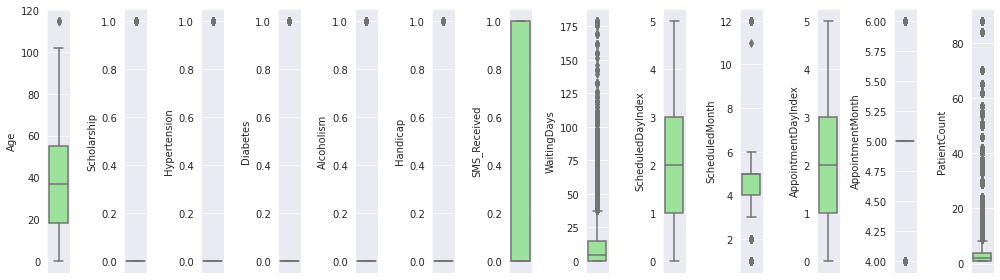

In [ ]:
# Boxplot
plt.figure(figsize=(14,4))
features = num_df
for i in range(0, len(features)):
    plt.subplot(1,len(features), i+1)
    sns.boxplot(y=df[features[i]], color='lightgreen')
    plt.tight_layout()

* `Age` has outliers for value above 100
* `WaitingDays` and `PatientCount` has many outliers

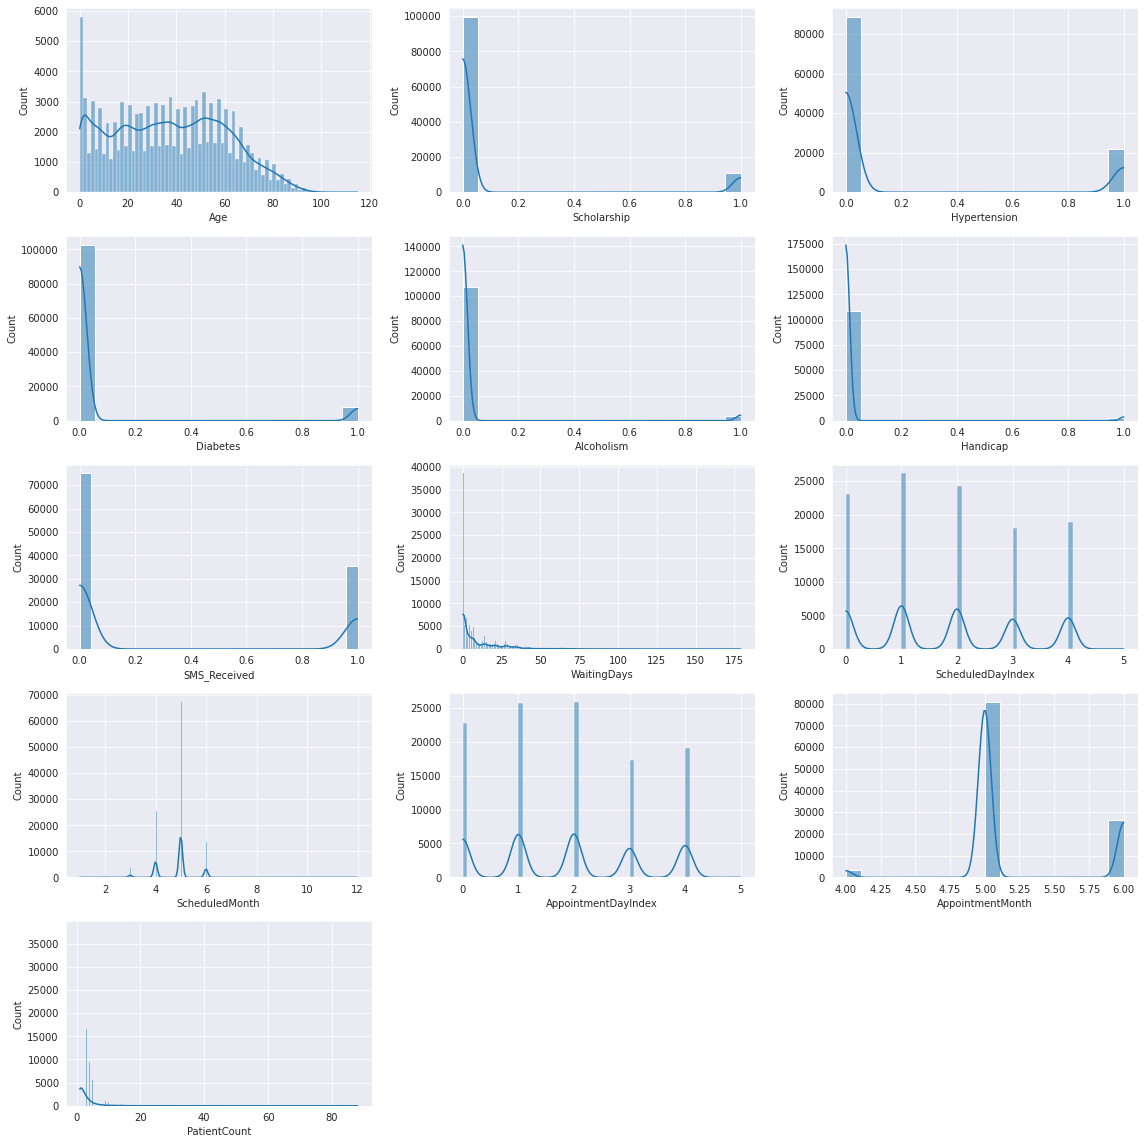

In [ ]:
# Distribution of numerical columns
plt.figure(figsize=(16,16))
y=1
for i in num_df:
    plt.subplot(5,3,y)
    sns.histplot(df[i],kde=True)
    y+=1
plt.tight_layout()
plt.show()

* `Age` has 0 as the most frequent, while the rest distribution is quite balanced.
* `WaitingDays` and `PatientCount` are right skewed with 0 as the most frequent.
* ScheduledDay and AppointmentDay don't occur on Sunday, but pretty balanced on other days.
* All binary columns are dominated with value 0.

## Target Data: No_Show

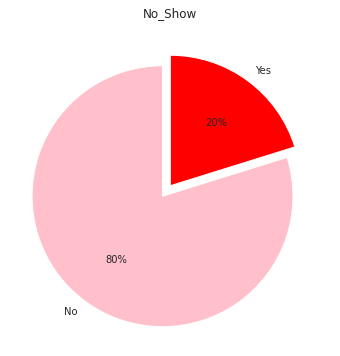

In [ ]:
# Count
No_Show_count = df.groupby('No_Show', as_index=False).size()

#Create chart
plt.figure(figsize=(6,6))
plt.pie(data=No_Show_count, 
        x='size', 
        labels='No_Show',
        startangle=90,
        explode=(0.1,0),
        colors=('pink','red'),
        autopct=lambda p: '{:.0f}%'.format(p),
        wedgeprops={'linewidth':1, 'edgecolor':'white'})
plt.title('No_Show')
plt.show()

* The data is imbalanced because patients that don't attend is 20% while attending patients is 80%.

## Patient's Profile

### Gender

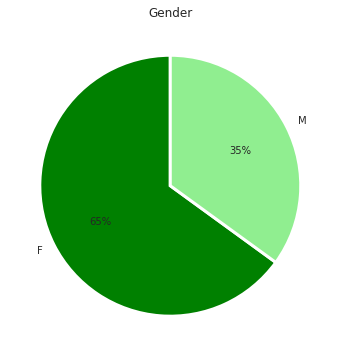

In [ ]:
# Count
Gender_count = df.groupby('Gender', as_index=False).size()

#Create chart
plt.figure(figsize=(6,6))
plt.pie(data=Gender_count, 
        x='size', 
        labels='Gender',
        startangle=90,
        colors=('green','lightgreen'),
        autopct=lambda p: '{:.0f}%'.format(p),
        wedgeprops={'linewidth':3, 'edgecolor':'white'})
plt.title('Gender')
plt.show()

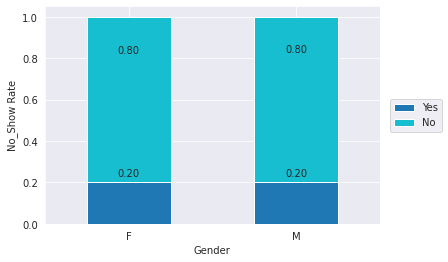

In [ ]:
# Column count
Gender_count2 = pd.crosstab(df['Gender'], df['No_Show'], values=df['AppointmentID'], aggfunc='count', normalize='index')[['Yes','No']]

# Create chart
ax = Gender_count2.plot(kind='bar', stacked=True, colormap='tab10', figsize=(6,4))

# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.2f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Rotate x-axis labels    
plt.xticks(rotation=0) 

# Add axis titles
plt.xlabel('Gender')
plt.ylabel('No_Show Rate')

# Set legend
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5))

plt.show()

Observation:
* The patients are mostly female.
* No_Show rate is the same at 20% for both genders.

### Age

In [ ]:
# Adding new column for age grouping
bins= [0,1,10,20,30,40,50,150]
labels = ['0','1-9','10-19','20-29','30-39','40-49','>= 50']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

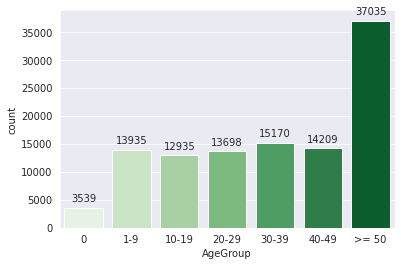

In [ ]:
# Create chart
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['AgeGroup'], palette='Greens')

# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.0f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

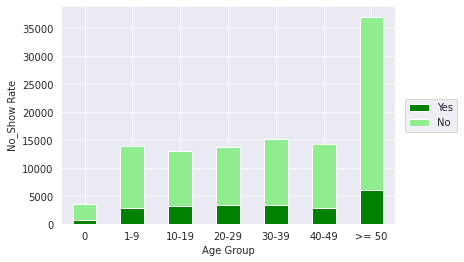

In [ ]:
# Column count
Age_count = pd.crosstab(df['AgeGroup'], df['No_Show'], values=df['AppointmentID'], aggfunc='count')[['Yes','No']]

# Create chart
ax = Age_count.plot(kind='bar', stacked=True, color=('green','lightgreen'), figsize=(6,4))

"""
# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.2f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
"""

# Rotate x-axis labels    
plt.xticks(rotation=0) 


# Add axis titles
plt.xlabel('Age Group')
plt.ylabel('No_Show Rate')

# Set legend
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5))

plt.show()

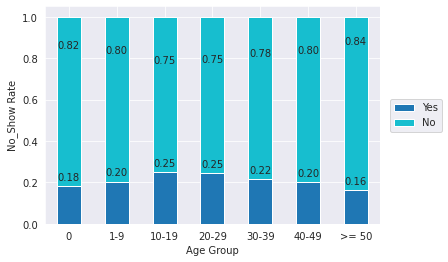

In [ ]:
# Column count
Age_count = pd.crosstab(df['AgeGroup'], df['No_Show'], values=df['AppointmentID'], aggfunc='count', normalize='index')[['Yes','No']]

# Create chart
ax = Age_count.plot(kind='bar', stacked=True, colormap='tab10', figsize=(6,4))

# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.2f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Rotate x-axis labels    
plt.xticks(rotation=0) 

# Add axis titles
plt.xlabel('Age Group')
plt.ylabel('No_Show Rate')

# Set legend
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5))

plt.show()

Observation:
* Most of the patients are above 50 years old
* No_Show rate is relatively balanced across all age at about 20%, with the highest rate in age group 10 to 29 years old.

### Scholarship

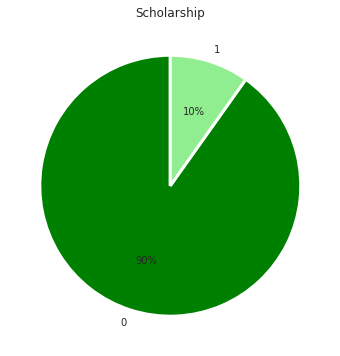

In [ ]:
# Count
Scholarship_count = df.groupby('Scholarship', as_index=False).size()

#Create chart
plt.figure(figsize=(6,6))
plt.pie(data=Scholarship_count, 
        x='size', 
        labels='Scholarship',
        startangle=90,
        colors=('green','lightgreen'),
        autopct=lambda p: '{:.0f}%'.format(p),
        wedgeprops={'linewidth':3, 'edgecolor':'white'})
plt.title('Scholarship')
plt.show()

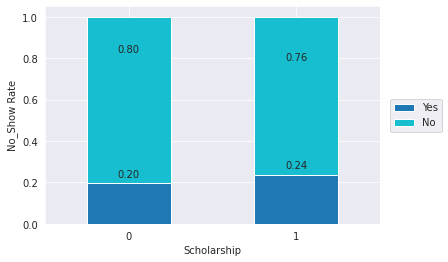

In [ ]:
# Column count
Scholarship_count2 = pd.crosstab(df['Scholarship'], df['No_Show'], values=df['AppointmentID'], aggfunc='count', normalize='index')[['Yes','No']]

# Create chart
ax = Scholarship_count2.plot(kind='bar', stacked=True, colormap='tab10', figsize=(6,4))

# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.2f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Rotate x-axis labels    
plt.xticks(rotation=0) 

# Add axis titles
plt.xlabel('Scholarship')
plt.ylabel('No_Show Rate')

# Set legend
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5))

plt.show()

### Hypertension

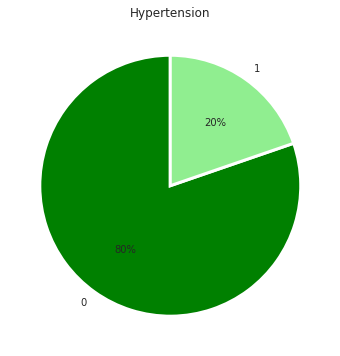

In [ ]:
# Count
Hypertension_count = df.groupby('Hypertension', as_index=False).size()

#Create chart
plt.figure(figsize=(6,6))
plt.pie(data=Hypertension_count, 
        x='size', 
        labels='Hypertension',
        startangle=90,
        colors=('green','lightgreen'),
        autopct=lambda p: '{:.0f}%'.format(p),
        wedgeprops={'linewidth':3, 'edgecolor':'white'})
plt.title('Hypertension')
plt.show()

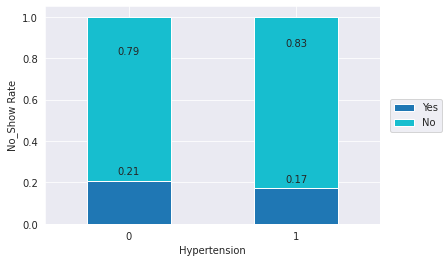

In [ ]:
# Column count
Hypertension_count2 = pd.crosstab(df['Hypertension'], df['No_Show'], values=df['AppointmentID'], aggfunc='count', normalize='index')[['Yes','No']]

# Create chart
ax = Hypertension_count2.plot(kind='bar', stacked=True, colormap='tab10', figsize=(6,4))

# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.2f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Rotate x-axis labels    
plt.xticks(rotation=0) 

# Add axis titles
plt.xlabel('Hypertension')
plt.ylabel('No_Show Rate')

# Set legend
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5))

plt.show()

### Diabetes

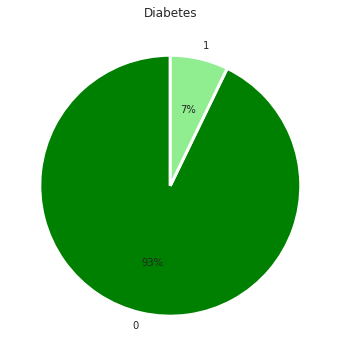

In [ ]:
# Count
Diabetes_count = df.groupby('Diabetes', as_index=False).size()

#Create chart
plt.figure(figsize=(6,6))
plt.pie(data=Diabetes_count, 
        x='size', 
        labels='Diabetes',
        startangle=90,
        colors=('green','lightgreen'),
        autopct=lambda p: '{:.0f}%'.format(p),
        wedgeprops={'linewidth':3, 'edgecolor':'white'})
plt.title('Diabetes')
plt.show()

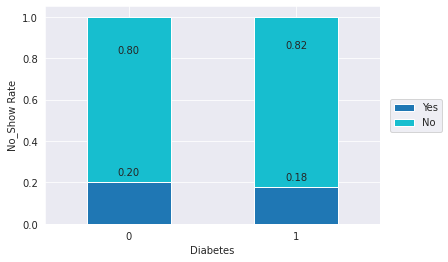

In [ ]:
# Column count
Diabetes_count2 = pd.crosstab(df['Diabetes'], df['No_Show'], values=df['AppointmentID'], aggfunc='count', normalize='index')[['Yes','No']]

# Create chart
ax = Diabetes_count2.plot(kind='bar', stacked=True, colormap='tab10', figsize=(6,4))

# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.2f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Rotate x-axis labels    
plt.xticks(rotation=0) 

# Add axis titles
plt.xlabel('Diabetes')
plt.ylabel('No_Show Rate')

# Set legend
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5))

plt.show()

### Alcoholism

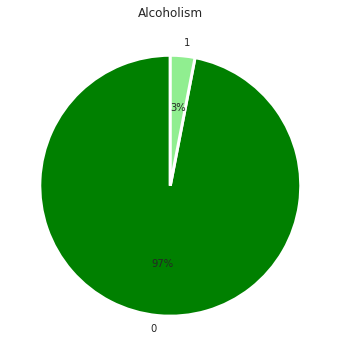

In [ ]:
# Count
Alcoholism_count = df.groupby('Alcoholism', as_index=False).size()

#Create chart
plt.figure(figsize=(6,6))
plt.pie(data=Alcoholism_count, 
        x='size', 
        labels='Alcoholism',
        startangle=90,
        colors=('green','lightgreen'),
        autopct=lambda p: '{:.0f}%'.format(p),
        wedgeprops={'linewidth':3, 'edgecolor':'white'})
plt.title('Alcoholism')
plt.show()

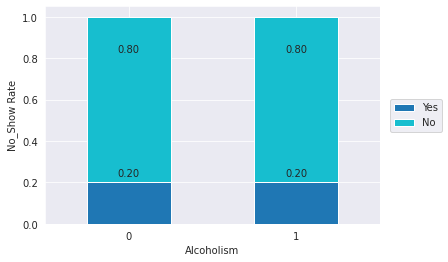

In [ ]:
# Column count
Alcoholism_count2 = pd.crosstab(df['Alcoholism'], df['No_Show'], values=df['AppointmentID'], aggfunc='count', normalize='index')[['Yes','No']]

# Create chart
ax = Alcoholism_count2.plot(kind='bar', stacked=True, colormap='tab10', figsize=(6,4))

# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.2f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Rotate x-axis labels    
plt.xticks(rotation=0) 

# Add axis titles
plt.xlabel('Alcoholism')
plt.ylabel('No_Show Rate')

# Set legend
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5))

plt.show()

### Handicap

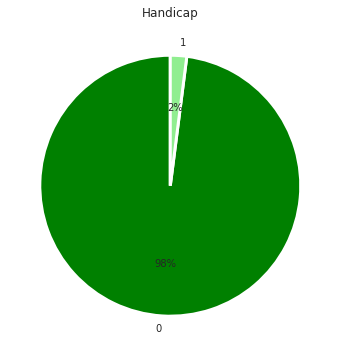

In [ ]:
# Count
Handicap_count = df.groupby('Handicap', as_index=False).size()

#Create chart
plt.figure(figsize=(6,6))
plt.pie(data=Handicap_count, 
        x='size', 
        labels='Handicap',
        startangle=90,
        colors=('green','lightgreen'),
        autopct=lambda p: '{:.0f}%'.format(p),
        wedgeprops={'linewidth':3, 'edgecolor':'white'})
plt.title('Handicap')
plt.show()

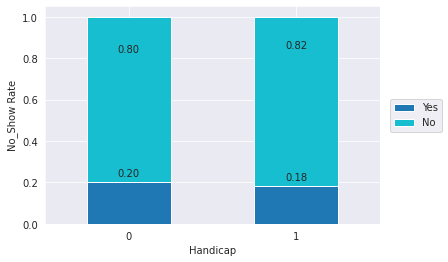

In [ ]:
# Column count
Handicap_count2 = pd.crosstab(df['Handicap'], df['No_Show'], values=df['AppointmentID'], aggfunc='count', normalize='index')[['Yes','No']]

# Create chart
ax = Handicap_count2.plot(kind='bar', stacked=True, colormap='tab10', figsize=(6,4))

# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.2f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Rotate x-axis labels    
plt.xticks(rotation=0) 

# Add axis titles
plt.xlabel('Handicap')
plt.ylabel('No_Show Rate')

# Set legend
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5))

plt.show()

## Hospital & Scheduling Activity

### SMS_Received

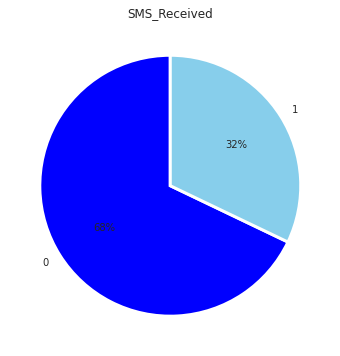

In [ ]:
# Count
SMS_Received_count = df.groupby('SMS_Received', as_index=False).size()

#Create chart
plt.figure(figsize=(6,6))
plt.pie(data=SMS_Received_count, 
        x='size', 
        labels='SMS_Received',
        startangle=90,
        colors=('blue','skyblue'),
        autopct=lambda p: '{:.0f}%'.format(p),
        wedgeprops={'linewidth':3, 'edgecolor':'white'})
plt.title('SMS_Received')
plt.show()

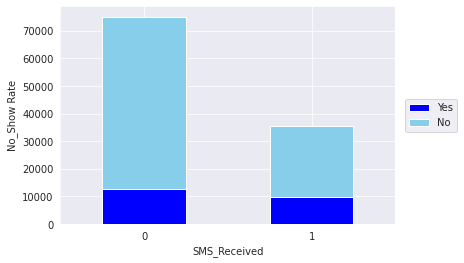

In [ ]:
# Column count
SMS_Received_count2 = pd.crosstab(df['SMS_Received'], df['No_Show'], values=df['AppointmentID'], aggfunc='count')[['Yes','No']]

# Create chart
ax = SMS_Received_count2.plot(kind='bar', stacked=True, color=('blue','skyblue'), figsize=(6,4))

# Rotate x-axis labels    
plt.xticks(rotation=0) 

# Add axis titles
plt.xlabel('SMS_Received')
plt.ylabel('No_Show Rate')

# Set legend
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5))

plt.show()

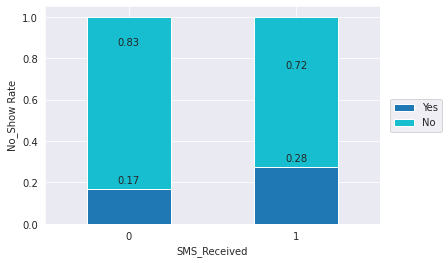

In [ ]:
# Column count
SMS_Received_count2 = pd.crosstab(df['SMS_Received'], df['No_Show'], values=df['AppointmentID'], aggfunc='count', normalize='index')[['Yes','No']]

# Create chart
ax = SMS_Received_count2.plot(kind='bar', stacked=True, colormap='tab10', figsize=(6,4))

# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.2f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Rotate x-axis labels    
plt.xticks(rotation=0) 

# Add axis titles
plt.xlabel('SMS_Received')
plt.ylabel('No_Show Rate')

# Set legend
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5))

plt.show()

### WaitingDays

In [ ]:
# Check max value for WaitingDays
df['WaitingDays'].max()

179

In [ ]:
# Adding new column for WaitingDays grouping
bins= [0,1,8,15,31,91,181]
labels = ['0','01-07','08-14','15-30','31-90','91-180']
df['WaitingDaysGroup'] = pd.cut(df['WaitingDays'], bins=bins, labels=labels, right=False)

WaitingDaysGroup range:
* 0: Same day
* 01-07: Week range
* 08-14: Two weeks range
* 15-30: Month range
* 31-90: Quarter range
* 91-180: Semester range

In [ ]:
df.groupby('WaitingDaysGroup', as_index=False).size()

,WaitingDaysGroup,size
0,0,38562
1,01-07,32185
2,08-14,12025
3,15-30,17371
4,31-90,10161
5,91-180,217


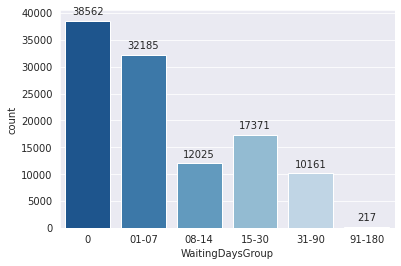

In [ ]:
# Create chart
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['WaitingDaysGroup'], palette='Blues_r')

# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.0f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

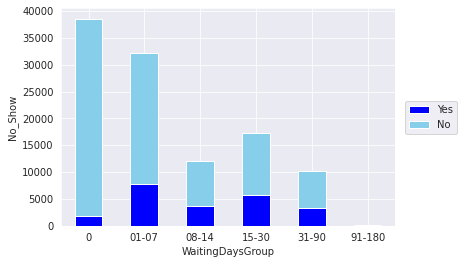

In [ ]:
# Column count
WaitingDays_count = pd.crosstab(df['WaitingDaysGroup'], df['No_Show'], values=df['AppointmentID'], aggfunc='count')[['Yes','No']]

# Create chart
ax = WaitingDays_count.plot(kind='bar', stacked=True, color=('blue','skyblue'), figsize=(6,4))

# Rotate x-axis labels    
plt.xticks(rotation=0) 

# Add axis titles
plt.xlabel('WaitingDaysGroup')
plt.ylabel('No_Show')

# Set legend
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5))

plt.show()

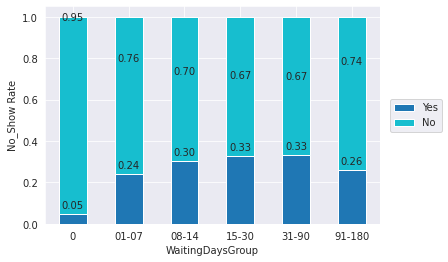

In [ ]:
# Column count
WaitingDays_count = pd.crosstab(df['WaitingDaysGroup'], df['No_Show'], values=df['AppointmentID'], aggfunc='count', normalize='index')[['Yes','No']]

# Create chart
ax = WaitingDays_count.plot(kind='bar', stacked=True, colormap='tab10', figsize=(6,4))

# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.2f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Rotate x-axis labels    
plt.xticks(rotation=0) 

# Add axis titles
plt.xlabel('WaitingDaysGroup')
plt.ylabel('No_Show Rate')

# Set legend
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5))

plt.show()

Observation:
* Most patients have same day and a week range appointment.
* The longer waiting day results in higher not attending appointment.

### Scheduling

In [ ]:
# Define xticks labels
index_order = [0,1,2,3,4,5,6]
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

month_index_order = [1,2,3,4,5,6,7,8,9,10,11,12]
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

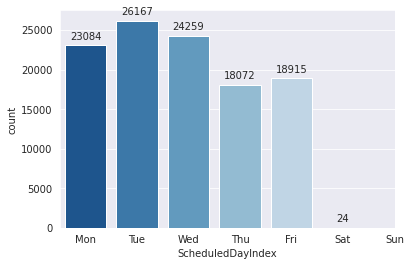

In [ ]:
# Create chart
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['ScheduledDayIndex'], palette='Blues_r')

# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.0f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
# Adjust x-axis labels    
plt.xticks(index_order, day_order, rotation=0) 

plt.show()

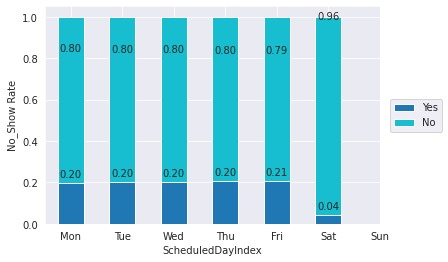

In [ ]:
# Column count
ScheduledDayIndex_count = pd.crosstab(df['ScheduledDayIndex'], df['No_Show'], values=df['AppointmentID'], aggfunc='count', normalize='index')[['Yes','No']]

# Create chart
ax = ScheduledDayIndex_count.plot(kind='bar', stacked=True, colormap='tab10', figsize=(6,4))

# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.2f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Adjust x-axis labels    
plt.xticks(index_order, day_order, rotation=0) 

# Add axis titles
plt.xlabel('ScheduledDayIndex')
plt.ylabel('No_Show Rate')

# Set legend
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5))

plt.show()

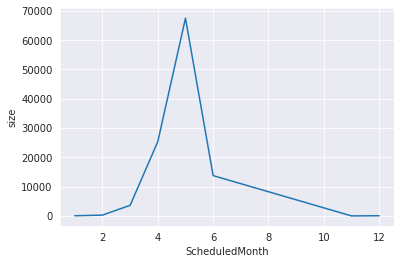

In [ ]:
# Count
ScheduledMonth_count = df.groupby('ScheduledMonth', as_index=False).size()

# Create chart
plt.figure(figsize=(6,4))
ax = sns.lineplot(data=ScheduledMonth_count, x='ScheduledMonth', y='size')

# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.0f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
# Adjust x-axis labels    
# plt.xticks(index_order, day_order, rotation=0) 

plt.show()

### AppointmentDayName

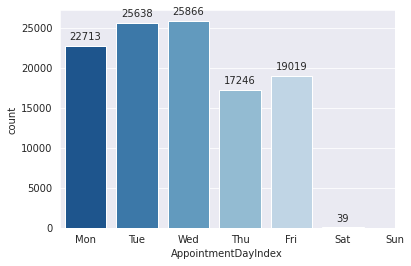

In [ ]:
# Create chart
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['AppointmentDayIndex'], palette='Blues_r')

# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.0f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
# Adjust x-axis labels    
plt.xticks(index_order, day_order, rotation=0) 

plt.show()

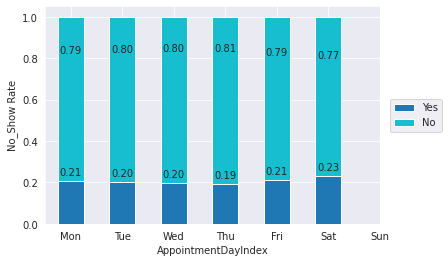

In [ ]:
# Column count
AppointmentDayIndex_count = pd.crosstab(df['AppointmentDayIndex'], df['No_Show'], values=df['AppointmentID'], aggfunc='count', normalize='index')[['Yes','No']]

# Create chart
ax = AppointmentDayIndex_count.plot(kind='bar', stacked=True, colormap='tab10', figsize=(6,4))

# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.2f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Adjust x-axis labels    
plt.xticks(index_order, day_order, rotation=0) 

# Add axis titles
plt.xlabel('AppointmentDayIndex')
plt.ylabel('No_Show Rate')

# Set legend
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5))

plt.show()

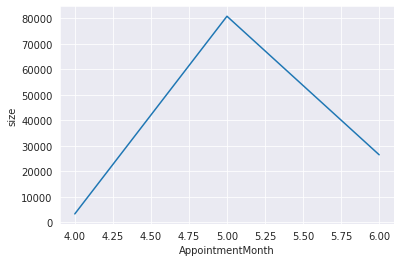

In [ ]:
# Count
AppointmentMonth_count = df.groupby('AppointmentMonth', as_index=False).size()

# Create chart
plt.figure(figsize=(6,4))
ax = sns.lineplot(data=AppointmentMonth_count, x='AppointmentMonth', y='size')

# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.0f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
# Adjust x-axis labels    
# plt.xticks(index_order, day_order, rotation=0) 

plt.show()

<Axes: xlabel='ScheduledDayIndex', ylabel='WaitingDays'>

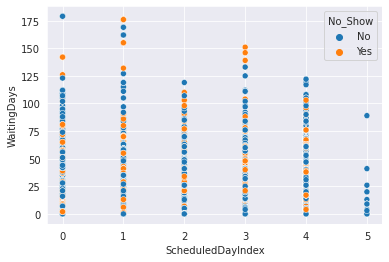

In [ ]:
#sct = sns.FacetGrid(df, col="No_Show")
#sct.map_dataframe(sns.scatterplot, x = 'ScheduledDayIndex', y = 'AppointmentDayIndex')
sns.scatterplot(x='ScheduledDayIndex', y='WaitingDays', data=df, hue='No_Show')
#sct.set_xlabels('Scheduled Day')
#sct.set_ylabels('Appointmnet Day')

### PatientCount

In [ ]:
# Check max value for PatientCount
df['PatientCount'].max()

88

In [ ]:
# Adding new column for PatientCount grouping
bins= [1,2,3,4,5,6,20]
labels = ['1','2','3','4','5','>5']
df['PatientCountGroup'] = pd.cut(df['PatientCount'], bins=bins, labels=labels, right=False)

In [ ]:
df.groupby('PatientCountGroup', as_index=False).size()

,PatientCountGroup,size
0,1,37920
1,2,27790
2,3,16497
3,4,9476
4,5,5585
5,>5,11562


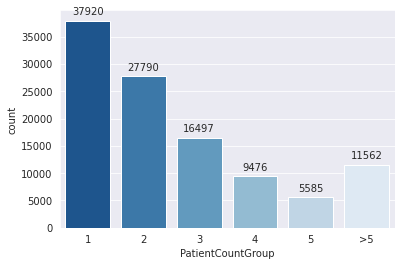

In [ ]:
# Create chart
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['PatientCountGroup'], palette='Blues_r')

# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.0f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

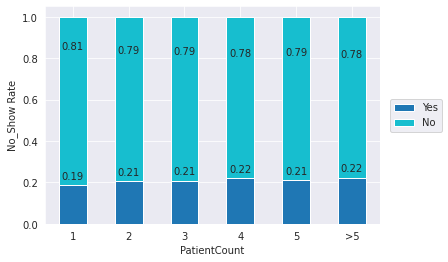

In [ ]:
# Column count
PatientCountGroup_count = pd.crosstab(df['PatientCountGroup'], df['No_Show'], values=df['AppointmentID'], aggfunc='count', normalize='index')[['Yes','No']]

# Create chart
ax = PatientCountGroup_count.plot(kind='bar', stacked=True, colormap='tab10', figsize=(6,4))

# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.2f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Rotate x-axis labels    
plt.xticks(rotation=0) 

# Add axis titles
plt.xlabel('PatientCount')
plt.ylabel('No_Show Rate')

# Set legend
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5))

plt.show()

### Neighbourhood

In [ ]:
# Top 10 Neighbourhood
Neighbourhood_count = df.groupby('Neighbourhood', as_index=False).size().sort_values(by='size', ascending=False)
Neighbourhood_count10 = Neighbourhood_count.head(10)
Neighbourhood_count10

,Neighbourhood,size
38,JARDIM CAMBURI,7717
43,MARIA ORTIZ,5805
59,RESISTÊNCIA,4430
39,JARDIM DA PENHA,3877
36,ITARARÉ,3514
10,CENTRO,3334
78,TABUAZEIRO,3131
66,SANTA MARTHA,3131
40,JESUS DE NAZARETH,2853
8,BONFIM,2773


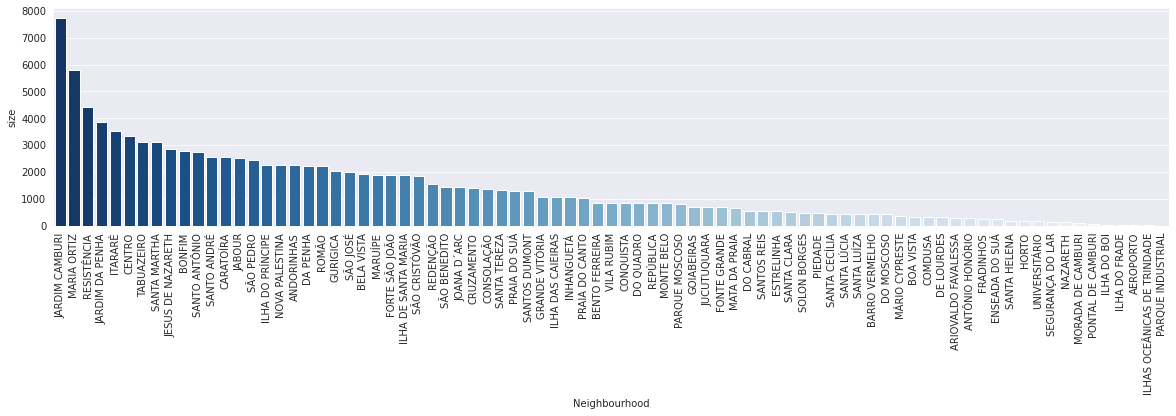

In [ ]:
# Create chart
plt.figure(figsize=(20,4))
ax = sns.barplot(data=Neighbourhood_count, x='Neighbourhood', y='size', palette='Blues_r')

"""
# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.0f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
"""

# Adjust x-axis labels    
plt.xticks(rotation=90) 

plt.show()

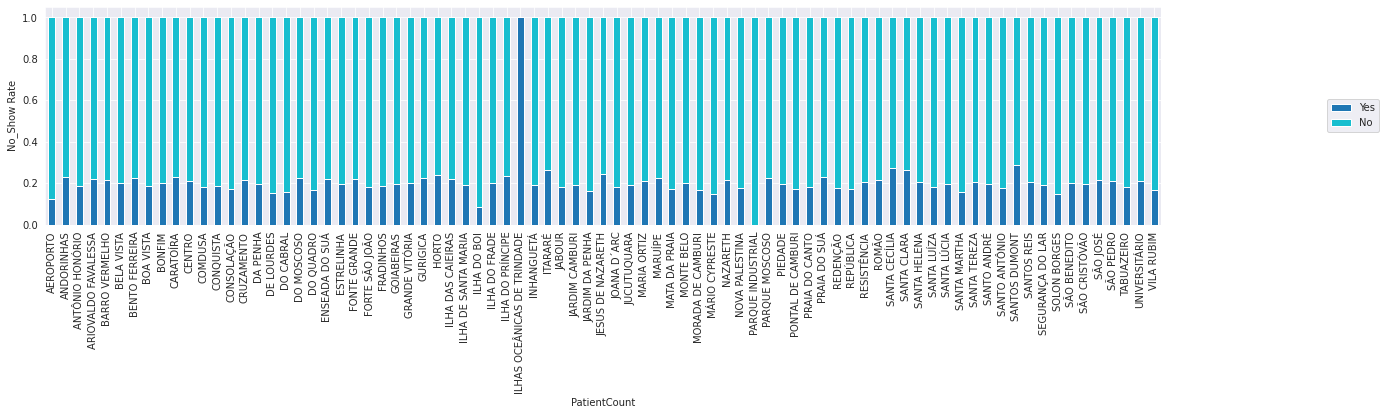

In [ ]:
# Column count
Neighbourhood_count2 = pd.crosstab(df['Neighbourhood'], df['No_Show'], values=df['AppointmentID'], aggfunc='count', normalize='index')[['Yes','No']]

# Create chart
ax = Neighbourhood_count2.plot(kind='bar', stacked=True, colormap='tab10', figsize=(20,4))

"""
# Add Label
for s in ax.patches:
    ax.annotate(format(s.get_height(), '.2f'), 
                   (s.get_x() + s.get_width() / 2., s.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Rotate x-axis labels    
plt.xticks(rotation=0) 
"""

# Add axis titles
plt.xlabel('PatientCount')
plt.ylabel('No_Show Rate')

# Set legend
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5))

plt.show()

# Data Preprocessing

## Label Encoding

In [ ]:
# Change Gender and No_Show column into boolean
df['Gender'] = df['Gender'].apply(lambda x: 1 if x=='M' else 0).astype(int)
df['No_Show'] = df['No_Show'].apply(lambda x: 1 if x=='Yes' else 0).astype(int)

## Drop Unnecessary Column

In [ ]:
df_baseline = df.drop(['PatientID','AppointmentID','ScheduledDay','AppointmentDay','AgeGroup','WaitingDaysGroup','PatientCountGroup',
                       'ScheduledTime'],1)

<ipython-input-80-f88e62220e2e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_baseline = df.drop(['PatientID','AppointmentID','ScheduledDay','AppointmentDay','AgeGroup','WaitingDaysGroup','PatientCountGroup',


In [ ]:
df_baseline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               110521 non-null  int64 
 1   Age                  110521 non-null  int64 
 2   Neighbourhood        110521 non-null  object
 3   Scholarship          110521 non-null  int64 
 4   Hypertension         110521 non-null  int64 
 5   Diabetes             110521 non-null  int64 
 6   Alcoholism           110521 non-null  int64 
 7   Handicap             110521 non-null  int64 
 8   SMS_Received         110521 non-null  int64 
 9   No_Show              110521 non-null  int64 
 10  WaitingDays          110521 non-null  int64 
 11  ScheduledDayIndex    110521 non-null  int64 
 12  ScheduledMonth       110521 non-null  int64 
 13  AppointmentDayIndex  110521 non-null  int64 
 14  AppointmentMonth     110521 non-null  int64 
 15  PatientCount         110521 non-nu

## One Hot Encoding

In [ ]:
# Creating dummy variables for the variable 'Neighbourhood'
nbh = pd.get_dummies(df_baseline['Neighbourhood'], prefix='Neighbourhood', drop_first=True)

# Adding the results to the master dataframe
df_baseline = pd.concat([df_baseline,nbh],axis=1)

In [ ]:
df_baseline = df_baseline.drop('Neighbourhood',1)

<ipython-input-83-42b178f10e95>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_baseline = df_baseline.drop('Neighbourhood',1)


# Modelling #1: Baseline

## Data Splitting

In [ ]:
X = df_baseline.drop('No_Show', axis=1)
y = df_baseline['No_Show']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Modelling

We will use 4 models as follows:
* Logistic Regression
* Decision Tree
* Random Forrest
* XBBoost

Since the data is imbalanced, we will use Precision and F1 Score for metric evaluation.


In [ ]:
# Define models
models = {"Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
          "Decision Tree": DecisionTreeClassifier(random_state=42),
          "Random Forest": RandomForestClassifier(random_state=42),
          "XGBoost":XGBClassifier(random_state=42, max_iter=1000)}

In [ ]:
model_df = []
accuracy = []
precision = []
recall = []
f1 = []

for model, model_launch in models.items(): 

    # Fit, train, predict
    model_initiated = model_launch
    model_initiated.fit(X_train, y_train)
    predictions = model_initiated.predict(X_test)
    
    # Append model name
    model_df.append(model)
    
    # Append metric evaluation
    accuracy.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    f1.append(f1_score(y_test, predictions))
    
    # Combine into data frame 
    score_baseline = pd.DataFrame({"Model":model_df,
                                 "Method": 'baseline',
                                 "Accuracy":accuracy, 
                                 "Precision":precision,
                                 "Recall":recall,
                                 "F1":f1}).sort_values(by="F1", ascending=False)

[04:39:01] WARNING: ../src/learner.cc:767: 
Parameters: { "max_iter" } are not used.



In [ ]:
score_baseline

,Model,Method,Accuracy,Precision,Recall,F1
1,Decision Tree,baseline,0.734268,0.338297,0.324264,0.331132
2,Random Forest,baseline,0.796155,0.492848,0.169045,0.251744
3,XGBoost,baseline,0.799140,0.534810,0.075379,0.132134
0,Logistic Regression,baseline,0.793802,0.331818,0.016280,0.031037


# Modelling #2

## Imbalance Handling

In [ ]:
# Undersampling
X_train_under, y_train_under = under_sampling.RandomUnderSampler().fit_resample(X_train, y_train)
df_undersampling = pd.concat([X_train_under, y_train_under], axis=1)

# Oversampling
X_train_over, y_train_over = over_sampling.RandomOverSampler().fit_resample(X_train, y_train)
df_oversampling = pd.concat([X_train_over, y_train_over], axis=1)

# Oversampling with smote
X_train_smote, y_train_smote = over_sampling.SMOTE().fit_resample(X_train, y_train)
df_oversampling_smote = pd.concat([X_train_smote, y_train_smote], axis=1)

## Modelling

### Undersampling

In [ ]:
model_df = []
accuracy = []
precision = []
recall = []
f1 = []

for model, model_launch in models.items(): 

    # Fit, train, predict
    model_initiated = model_launch
    model_initiated.fit(X_train_under, y_train_under)
    predictions = model_initiated.predict(X_test)
    
    # Append model name
    model_df.append(model)
    
    # Append metric evaluation
    accuracy.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    f1.append(f1_score(y_test, predictions))
    
    # Combine into data frame 
    score_undersampling = pd.DataFrame({"Model":model_df,
                                 "Method": 'undersampling',
                                 "Accuracy":accuracy, 
                                 "Precision":precision,
                                 "Recall":recall,
                                 "F1":f1}).sort_values(by="F1", ascending=False)

[04:39:55] WARNING: ../src/learner.cc:767: 
Parameters: { "max_iter" } are not used.



In [ ]:
score_undersampling

,Model,Method,Accuracy,Precision,Recall,F1
3,XGBoost,undersampling,0.613210,0.318709,0.797056,0.455345
2,Random Forest,undersampling,0.628500,0.322103,0.752676,0.451143
0,Logistic Regression,undersampling,0.653698,0.310551,0.579616,0.404419
1,Decision Tree,undersampling,0.614522,0.289761,0.620428,0.395030


### Oversampling

In [ ]:
model_df = []
accuracy = []
precision = []
recall = []
f1 = []

for model, model_launch in models.items(): 

    # Fit, train, predict
    model_initiated = model_launch
    model_initiated.fit(X_train_over, y_train_over)
    predictions = model_initiated.predict(X_test)
    
    # Append model name
    model_df.append(model)
    
    # Append metric evaluation
    accuracy.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    f1.append(f1_score(y_test, predictions))
    
    # Combine into data frame 
    score_oversampling = pd.DataFrame({"Model":model_df,
                                 "Method": 'oversampling',
                                 "Accuracy":accuracy, 
                                 "Precision":precision,
                                 "Recall":recall,
                                 "F1":f1})

[04:41:17] WARNING: ../src/learner.cc:767: 
Parameters: { "max_iter" } are not used.



In [ ]:
score_oversampling

,Model,Method,Accuracy,Precision,Recall,F1
0,Logistic Regression,oversampling,0.653427,0.309874,0.577386,0.403302
1,Decision Tree,oversampling,0.722416,0.334932,0.373773,0.353288
2,Random Forest,oversampling,0.770685,0.409415,0.294826,0.342798
3,XGBoost,oversampling,0.633024,0.327238,0.766280,0.458623


### Oversampling SMOTE

In [ ]:
model_df = []
accuracy = []
precision = []
recall = []
f1 = []

for model, model_launch in models.items(): 

    # Fit, train, predict
    model_initiated = model_launch
    model_initiated.fit(X_train_smote, y_train_smote)
    predictions = model_initiated.predict(X_test)
    
    # Append model name
    model_df.append(model)
    
    # Append metric evaluation
    accuracy.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    f1.append(f1_score(y_test, predictions))
    
    # Combine into data frame 
    score_smote = pd.DataFrame({"Model":model_df,
                                 "Method": 'oversampling SMOTE',
                                 "Accuracy":accuracy, 
                                 "Precision":precision,
                                 "Recall":recall,
                                 "F1":f1}).sort_values(by="F1", ascending=False)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[04:43:21] WARNING: ../src/learner.cc:767: 
Parameters: { "max_iter" } are not used.



In [ ]:
score_smote

,Model,Method,Accuracy,Precision,Recall,F1
3,XGBoost,oversampling SMOTE,0.753992,0.381461,0.342328,0.360837
1,Decision Tree,oversampling SMOTE,0.710654,0.322766,0.388269,0.352501
2,Random Forest,oversampling SMOTE,0.755757,0.377247,0.313559,0.342467
0,Logistic Regression,oversampling SMOTE,0.783126,0.361360,0.090098,0.144234


The results in Modelling #2 and Modelling #1 are compared, and undersampling has the best score in almost all model. The undersampling method will be carried to the next modelling

# Modelling #3

## Scaling

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train_under)
X_train_under_scaled = scaler.transform(X_train_under)

In [ ]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [ ]:
model_df = []
accuracy = []
precision = []
recall = []
f1 = []

for model, model_launch in models.items(): 

    # Fit, train, predict
    model_initiated = model_launch
    model_initiated.fit(X_train_under_scaled, y_train_under)
    predictions = model_initiated.predict(X_test_scaled)
    
    # Append model name
    model_df.append(model)
    
    # Append metric evaluation
    accuracy.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    f1.append(f1_score(y_test, predictions))
    
    # Combine into data frame 
    score_undersampling_scaled = pd.DataFrame({"Model":model_df,
                                 "Method": 'undersampling - scaled',
                                 "Accuracy":accuracy, 
                                 "Precision":precision,
                                 "Recall":recall,
                                 "F1":f1}).sort_values(by="F1", ascending=False)

[04:44:15] WARNING: ../src/learner.cc:767: 
Parameters: { "max_iter" } are not used.



In [ ]:
score_undersampling_scaled

,Model,Method,Accuracy,Precision,Recall,F1
3,XGBoost,undersampling - scaled,0.621217,0.320602,0.774978,0.453567
2,Random Forest,undersampling - scaled,0.628319,0.318870,0.732605,0.444339
0,Logistic Regression,undersampling - scaled,0.658539,0.311794,0.566012,0.402091
1,Decision Tree,undersampling - scaled,0.614476,0.283601,0.590098,0.383090


The result is worse than undersampling without scaling.

# Evaluation

In [ ]:
# plot feature importance
plot_importance(model)
plt.show()

ValueError: ignored

In [ ]:
# Confusion Matrix of XGBoost with Undersampling
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, X_train_under),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("Confusion Matrix XGBoost",fontsize=14)
plt.show()